<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/xpW5D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌟 Exercise 1 : Understanding the problem and Data Collection
We want to predict if an individual will have diabetes.

Load the diabetes dataset and explore it.

How many positive and negative cases is there ?

Split the data into training and testing sets

In [ ]:
from google.colab import files
uploaded = files.upload()
# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 12.0MB/s]


In [ ]:
!unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
#check null value
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
# Print unique values and their counts in 'smoking_history'
value_counts = df["smoking_history"].value_counts()
print(value_counts)

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [ ]:
# Mapping 'not current' and 'ever' to 'former'
df["smoking_history"] = df["smoking_history"].replace({"not current": "former", "ever": "former"})

# Count unique values after merging
print(df["smoking_history"].value_counts())

smoking_history
No Info    35816
never      35095
former     19803
current     9286
Name: count, dtype: int64


In [ ]:
# #drop 'No info' from 'smoking_history'
# df = df[df["smoking_history"] != "No Info"]

In [ ]:
# Print unique values and their counts in 'diabetes'
value_counts = df["diabetes"].value_counts()
print(value_counts)

diabetes
0    91500
1     8500
Name: count, dtype: int64


Positive 8500 cases

In [ ]:
df = pd.get_dummies(df, columns=["smoking_history"], drop_first=False)

In [ ]:
# Print unique values and their counts in 'gender'
value_counts = df["gender"].value_counts()
print(value_counts)

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [ ]:
# Create dummy variables for gender, including all categories
df = pd.get_dummies(df, columns=["gender"], drop_first=False)

In [ ]:
df[['gender_Female', 'gender_Male', 'gender_Other', 'smoking_history_No Info',	'smoking_history_current',	'smoking_history_former',	'smoking_history_never']] = df[['gender_Female', 'gender_Male', 'gender_Other', 'smoking_history_No Info',	'smoking_history_current',	'smoking_history_former',	'smoking_history_never']].astype(int)

In [ ]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_former,smoking_history_never,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      100000 non-null  float64
 1   hypertension             100000 non-null  int64  
 2   heart_disease            100000 non-null  int64  
 3   bmi                      100000 non-null  float64
 4   HbA1c_level              100000 non-null  float64
 5   blood_glucose_level      100000 non-null  int64  
 6   diabetes                 100000 non-null  int64  
 7   smoking_history_No Info  100000 non-null  int64  
 8   smoking_history_current  100000 non-null  int64  
 9   smoking_history_former   100000 non-null  int64  
 10  smoking_history_never    100000 non-null  int64  
 11  gender_Female            100000 non-null  int64  
 12  gender_Male              100000 non-null  int64  
 13  gender_Other             100000 non-null  int64  
dtypes: fl

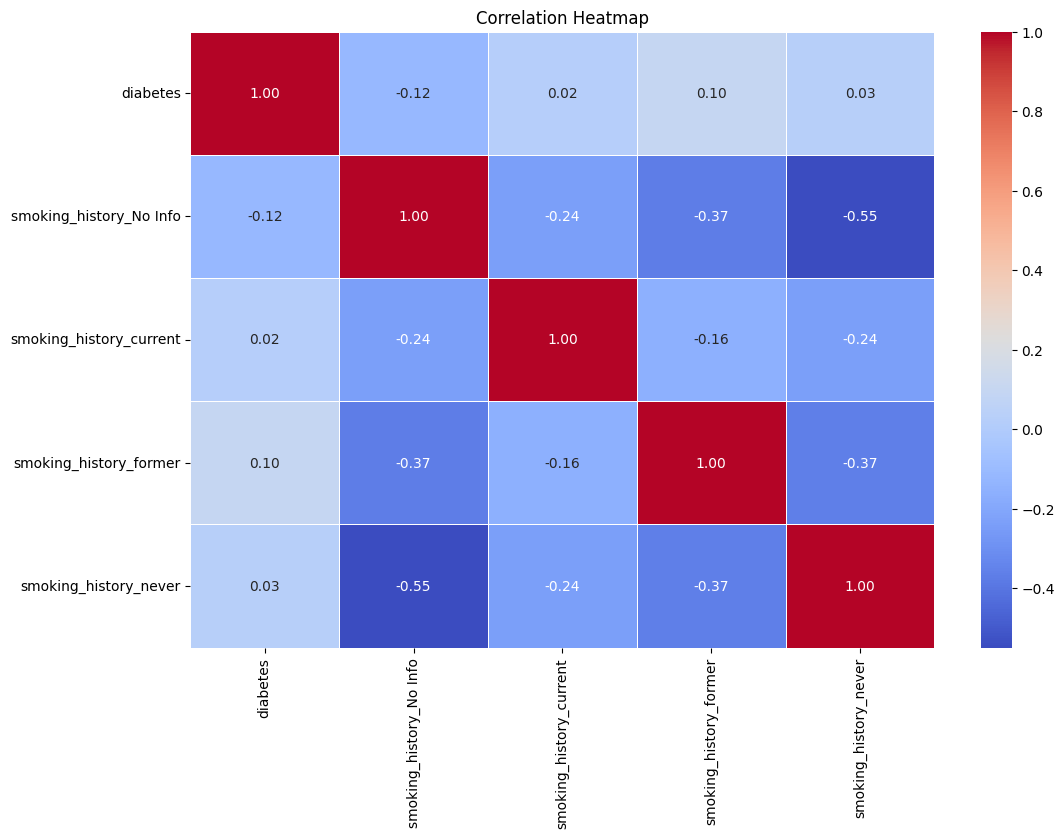

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns for correlation (skip the categorical ones)
numerical_columns = ['diabetes', 'smoking_history_No Info', 'smoking_history_current', 'smoking_history_former', 'smoking_history_never']

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

There are no significant correlations between smoking and diabetes, so I decided not to drop the No info values from 'smoking_history'.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = df.drop(columns=['diabetes'])  # Features: all columns except 'diabetes'
y = df['diabetes']  # Target: the 'diabetes' column

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the resulting datasets
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (80000, 13)
Testing set size: (20000, 13)


# 🌟 Exercise 2 : Model Picking and Standardization

Which classification model can we use in this problem and why ?

Do we need to standardize the data ? If yes, use .StandardScaler()


We use Logistic Regression in this problem becouse this model use for predicting binary values (yes/no diabetes)

The **StandardScaler()** from sklearn.preprocessing is a feature scaling method that standardizes numerical data by transforming it to have a mean of 0 and a standard deviation of 1. It ensures that all features contribute equally to the model, making training more stable and preventing bias due to varying feature scales.

Some machine learning models (like **Logistic Regression**, SVM, KNN, PCA, Neural Networks) are sensitive to feature scales. Features with larger numerical ranges can dominate the learning process.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns for scaling
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform only the numerical columns in training set
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform only the numerical columns in testing set
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 🌟 Exercise 3 : Model Training

We will use, the logistic regression model, Train it.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Step 1: Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Step 2: Train (fit) the model on the training set
log_reg.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = log_reg.predict(X_test)

# 🌟 Exercise 4 : Evaluation Metrics

Plot the accuracy score and comment the results.

Plot the confusion matrix and comment the results.

Plot the Recall, precision, F1-score and comment the results.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9589

Confusion Matrix:
[[18126   166]
 [  655  1053]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



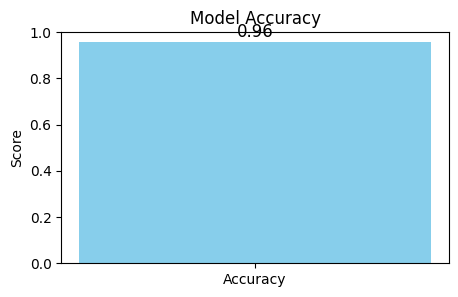

Accuracy: 0.9589
✅ Accuracy shows the overall performance, but it does not tell us about false positives or false negatives.


In [ ]:
# Plot Accuracy Score
plt.figure(figsize=(5, 3))
plt.bar(["Accuracy"], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Accuracy")
plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha='center', fontsize=12)
plt.show()

# Comment on accuracy:
print(f"Accuracy: {accuracy:.4f}")
print("✅ Accuracy shows the overall performance, but it does not tell us about false positives or false negatives.")


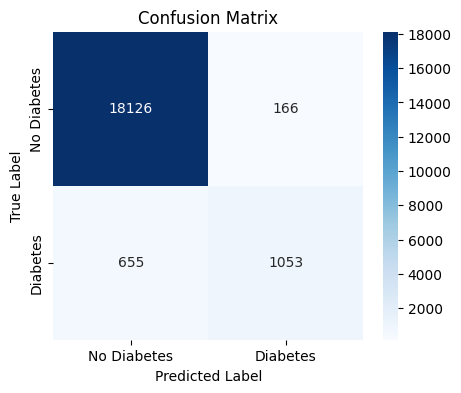

✅ The confusion matrix shows the number of correct and incorrect predictions.
True Negatives: 18126, False Positives: 166
False Negatives: 655, True Positives: 1053
🔹 False Positives (Type I Error) → Healthy individuals wrongly classified as diabetic.
🔹 False Negatives (Type II Error) → Diabetic patients wrongly classified as healthy (more dangerous).


In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Comment on confusion matrix:
print("✅ The confusion matrix shows the number of correct and incorrect predictions.")
print(f"True Negatives: {conf_matrix[0,0]}, False Positives: {conf_matrix[0,1]}")
print(f"False Negatives: {conf_matrix[1,0]}, True Positives: {conf_matrix[1,1]}")
print("🔹 False Positives (Type I Error) → Healthy individuals wrongly classified as diabetic.")
print("🔹 False Negatives (Type II Error) → Diabetic patients wrongly classified as healthy (more dangerous).")

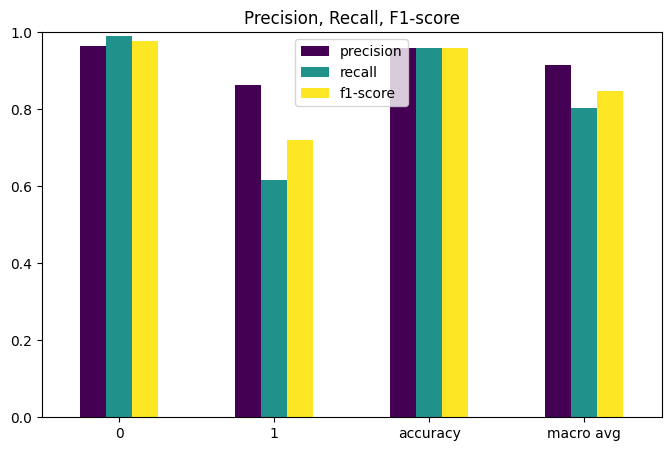

✅ Precision measures how many predicted diabetics are actually diabetics.
✅ Recall measures how many actual diabetics were correctly identified.
✅ F1-score balances precision and recall.
🔹 A high recall is crucial in medical cases to minimize false negatives (undiagnosed diabetes).


In [ ]:
# Generate classification report as a dictionary
class_report = classification_report(y_test, y_pred, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame.from_dict(class_report).transpose()

# Drop the 'support' column if it causes issues
if 'support' in report_df.columns:
    report_df = report_df.drop(columns=['support'])

# Plot Precision, Recall, F1-score
report_df.iloc[:-1, :].plot(kind="bar", figsize=(8, 5), colormap="viridis")
plt.title("Precision, Recall, F1-score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# Comment on Precision, Recall, F1-score:
print("✅ Precision measures how many predicted diabetics are actually diabetics.")
print("✅ Recall measures how many actual diabetics were correctly identified.")
print("✅ F1-score balances precision and recall.")
print("🔹 A high recall is crucial in medical cases to minimize false negatives (undiagnosed diabetes).")

# 🌟 Exercise 5 : Visualizing the performance of our model

Visualize the decision boundary with accuracy information.

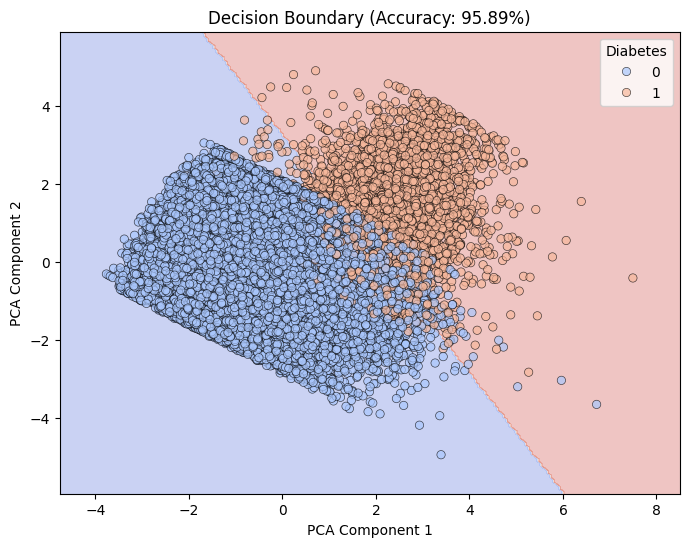

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Step 1: Reduce feature dimensions using PCA (2D projection)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 2: Train Logistic Regression on PCA-transformed data
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)

# Step 3: Create a decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on the mesh grid
Z = log_reg_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 4: Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="coolwarm", alpha=0.7, edgecolor="k")

# Step 5: Display accuracy
plt.title(f"Decision Boundary (Accuracy: {accuracy:.2%})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Diabetes")
plt.show()



# 🌟 Exercise 6 : ROC Curve

Plot the ROC Curve using this code template available on this link

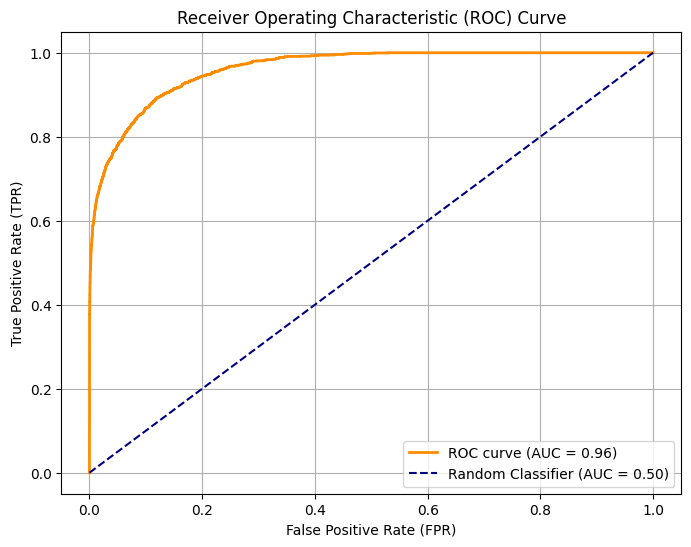

In [ ]:
from sklearn import metrics

# Compute predicted probabilities for the positive class (diabetes = 1)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)  # Compute AUC

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--", label="Random Classifier (AUC = 0.50)")  # Diagonal line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()